# Exploratory Data Analysis of FAANG Stock Prices

In [5]:
import pandas as pd

## Preview data for each ticker
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']
dfs = {}
for ticker in tickers:
    df = pd.read_csv(f'../data/{ticker}.csv')
    dfs[ticker] = df
    print(f"Head of {ticker} dataframe: ")
    print(df.head())
    print(f"Summary stats for {ticker}")
    print(df.describe())
    print('\n')
    

Head of AAPL dataframe: 
         Date      Close
0  2015-01-02  24.320436
1  2015-01-05  23.635292
2  2015-01-06  23.637510
3  2015-01-07  23.968958
4  2015-01-08  24.889902
Summary stats for AAPL
             Close
count  2515.000000
mean     94.117873
std      65.604394
min      20.674532
25%      35.323711
50%      64.593872
75%     150.733391
max     258.735504


Head of AMZN dataframe: 
         Date    Close
0  2015-01-02  15.4260
1  2015-01-05  15.1095
2  2015-01-06  14.7645
3  2015-01-07  14.9210
4  2015-01-08  15.0230
Summary stats for AMZN
             Close
count  2515.000000
mean    101.186108
std      54.133371
min      14.347500
25%      48.394751
50%      94.565002
75%     153.814995
max     232.929993


Head of GOOGL dataframe: 
         Date      Close
0  2015-01-02  26.351515
1  2015-01-05  25.849413
2  2015-01-06  25.211466
3  2015-01-07  25.137318
4  2015-01-08  25.224901
Summary stats for GOOGL
             Close
count  2515.000000
mean     82.298549
std      43.5

## Stock Closing Price Visualization

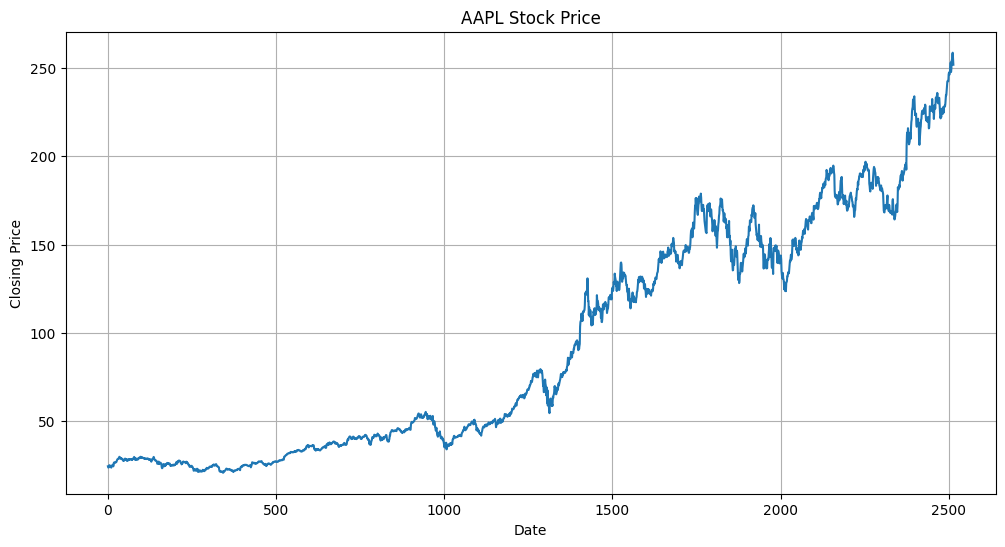

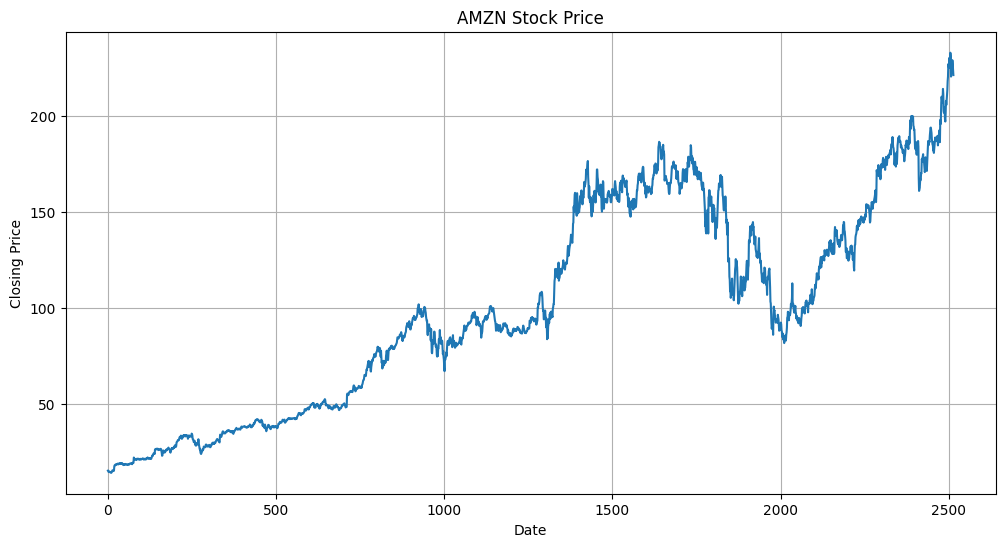

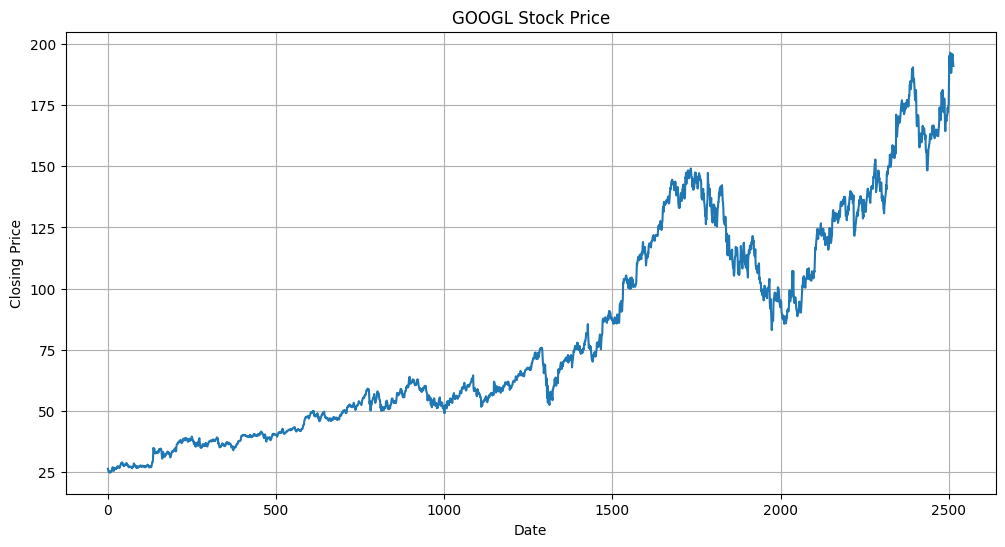

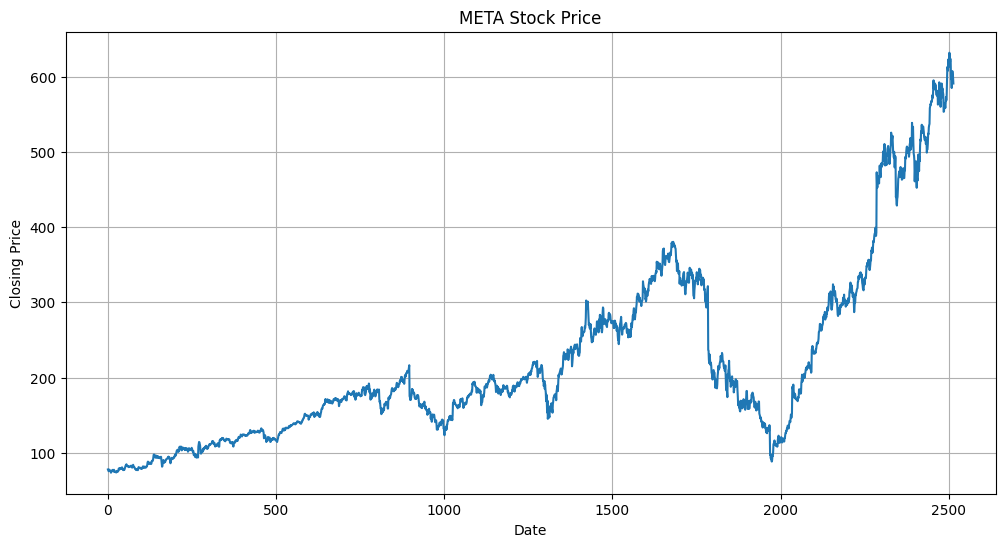

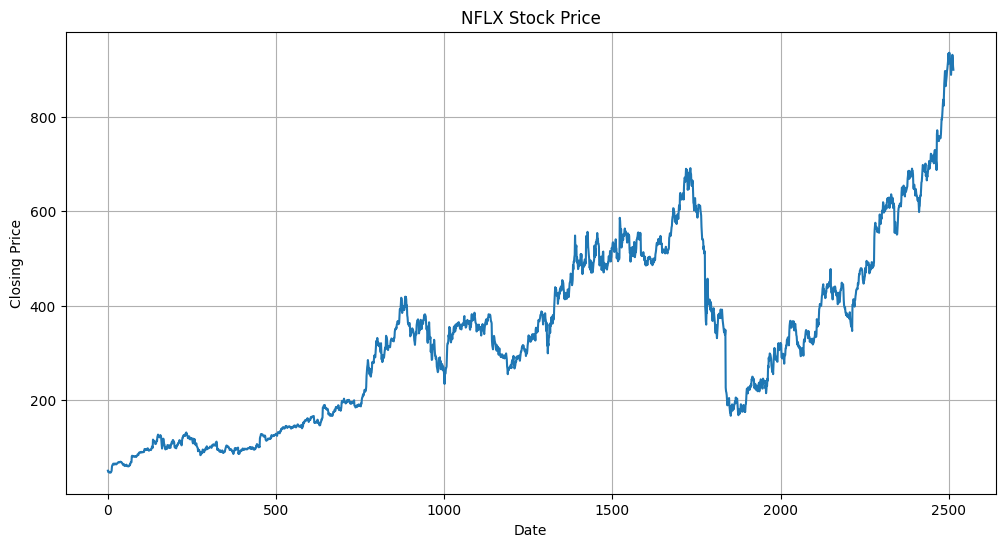

In [ ]:
import matplotlib.pyplot as plt

for ticker, df in dfs.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'])
    plt.title(f'{ticker} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()
    plt.close()

# Rolling Statistics

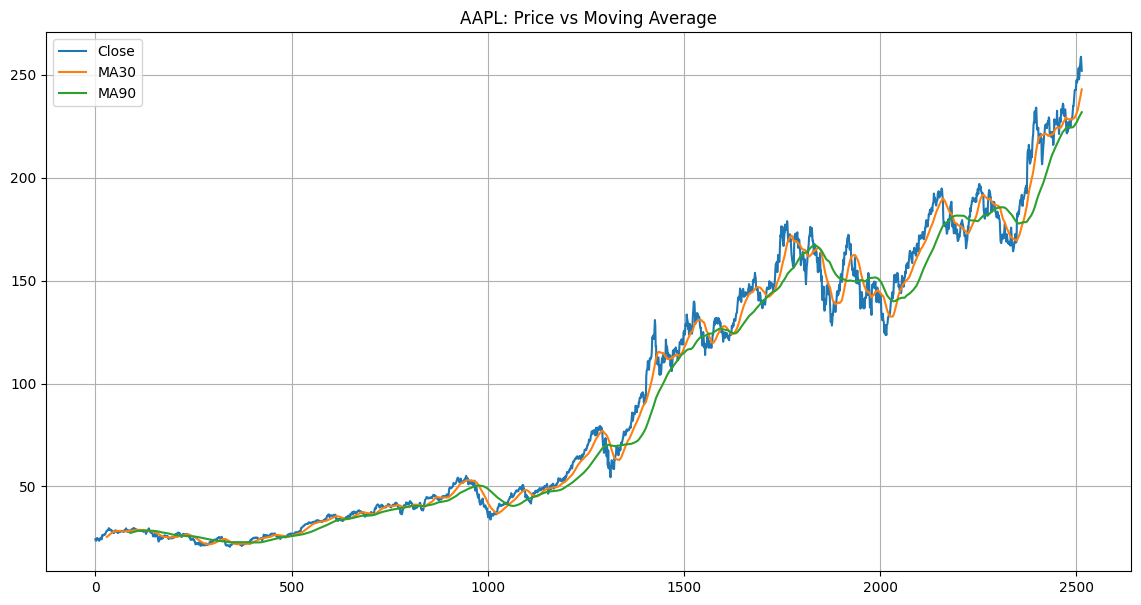

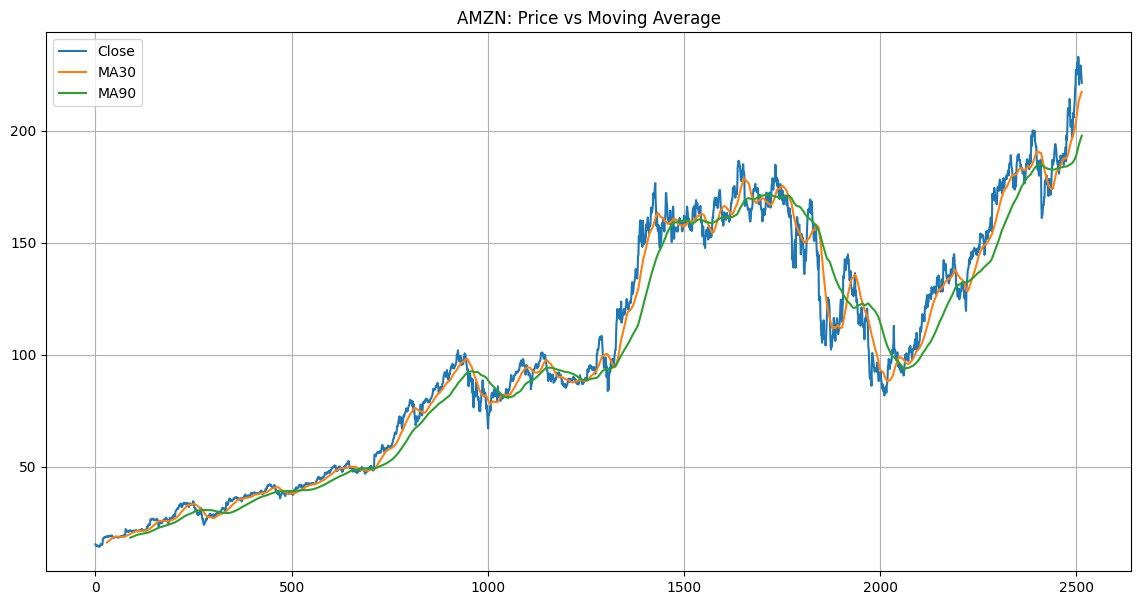

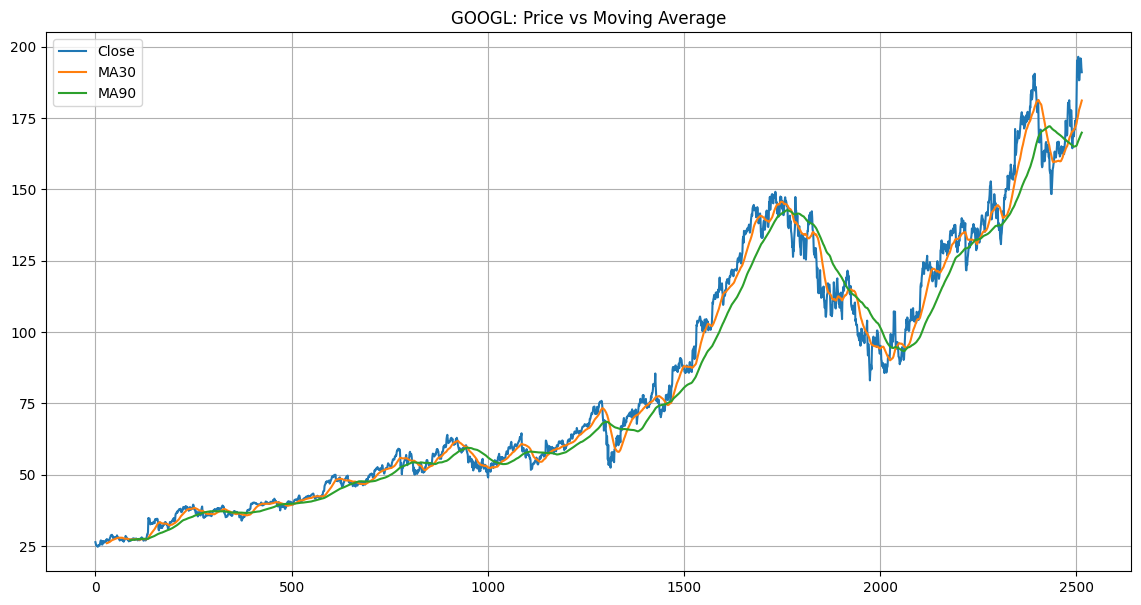

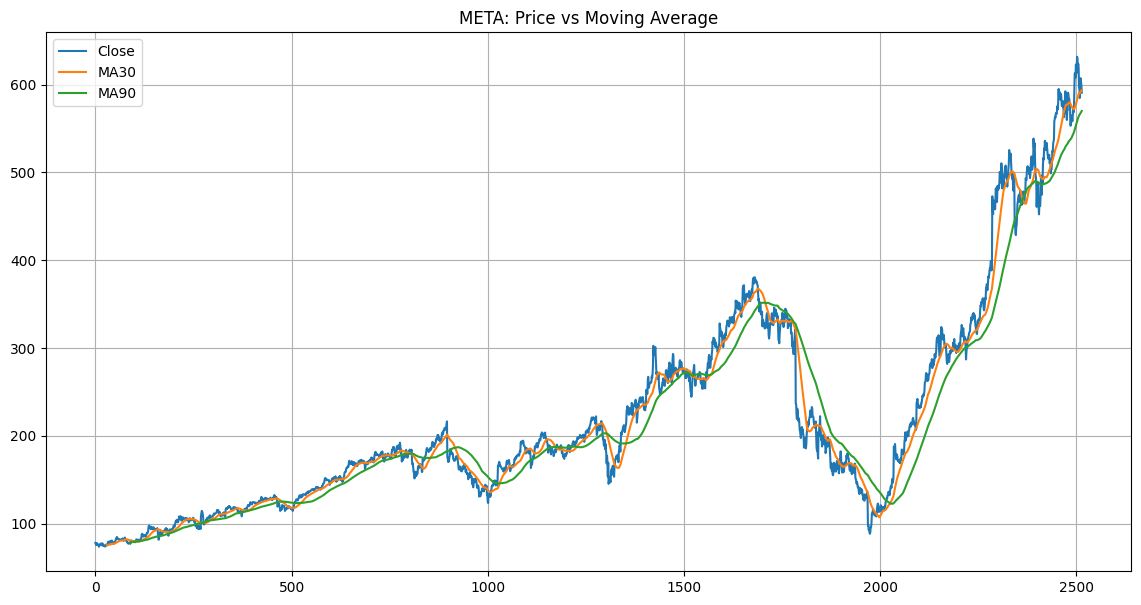

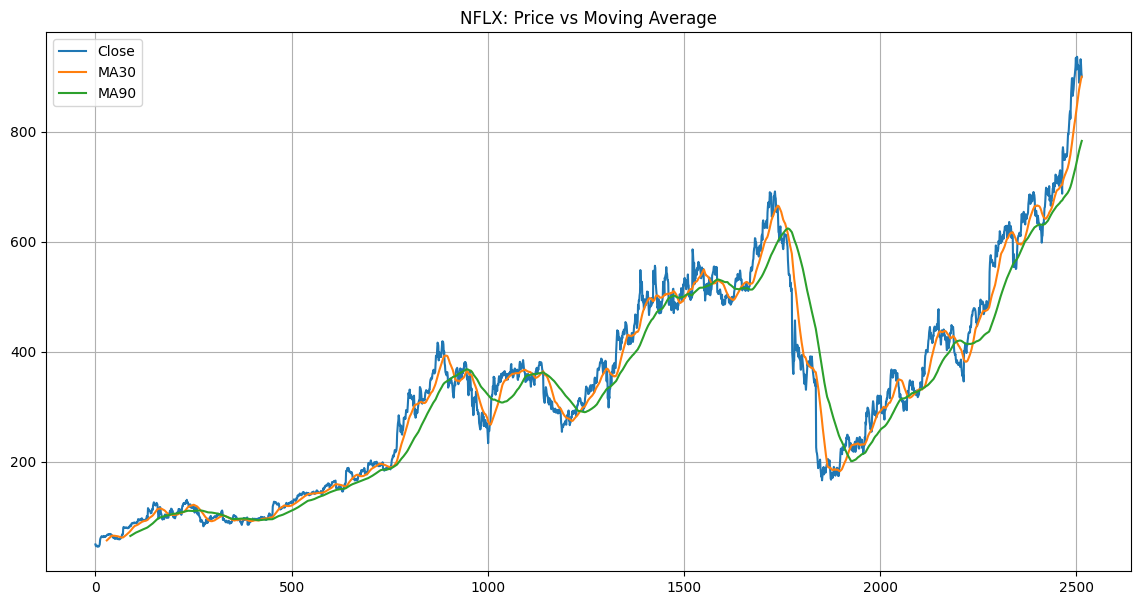

In [8]:
for ticker, df in dfs.items():
    df['MA30'] = df['Close'].rolling(window=30).mean()
    df['MA90'] = df['Close'].rolling(window=90).mean()
    df[['Close', 'MA30', 'MA90']].plot(figsize=(14,7))
    plt.title(f'{ticker}: Price vs Moving Average')
    plt.grid(True)
    plt.show()
    plt.close()

## Volatility Analysis

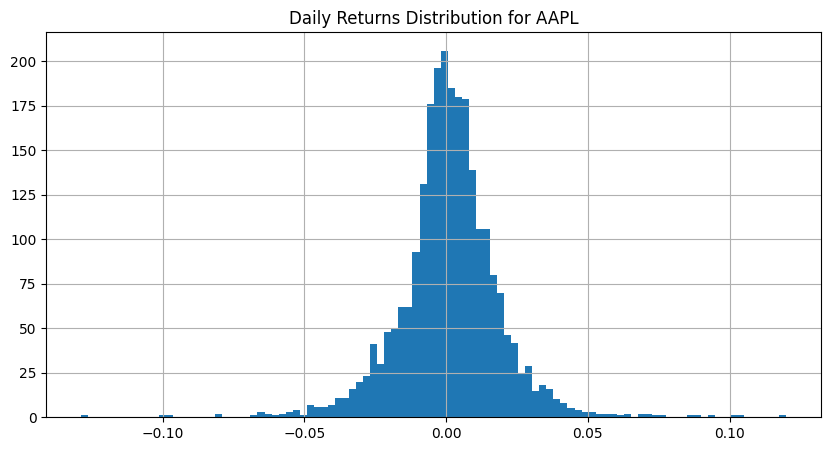

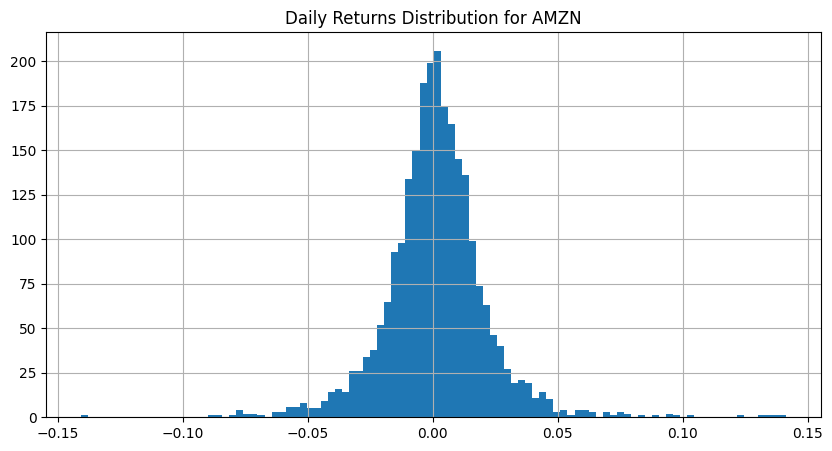

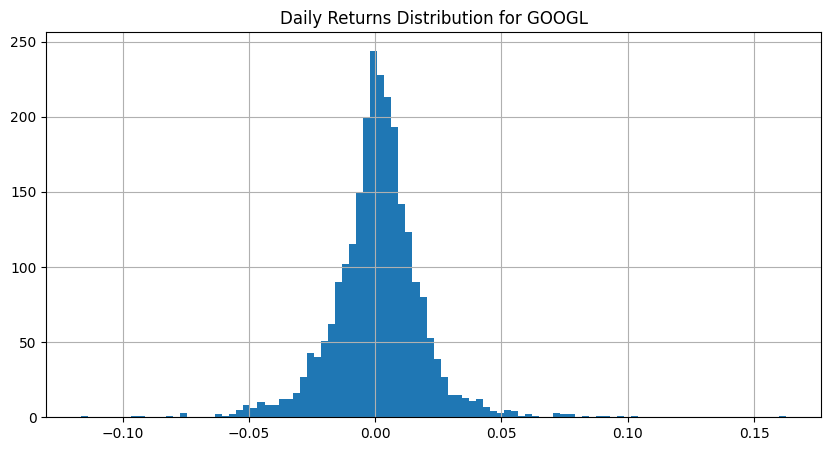

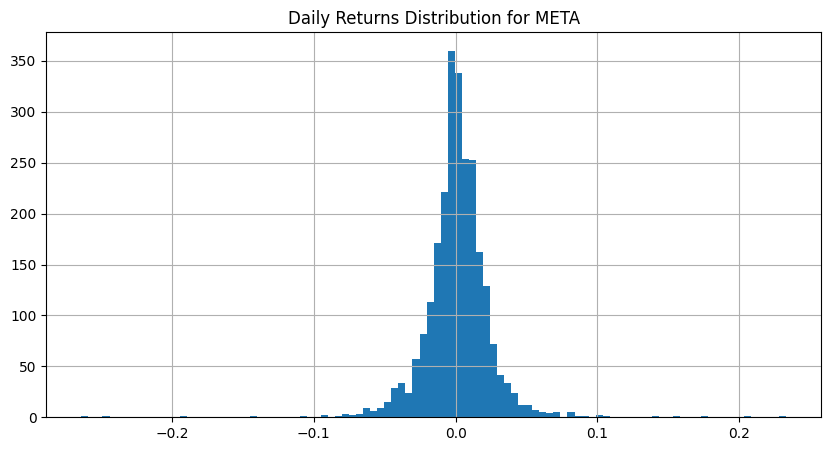

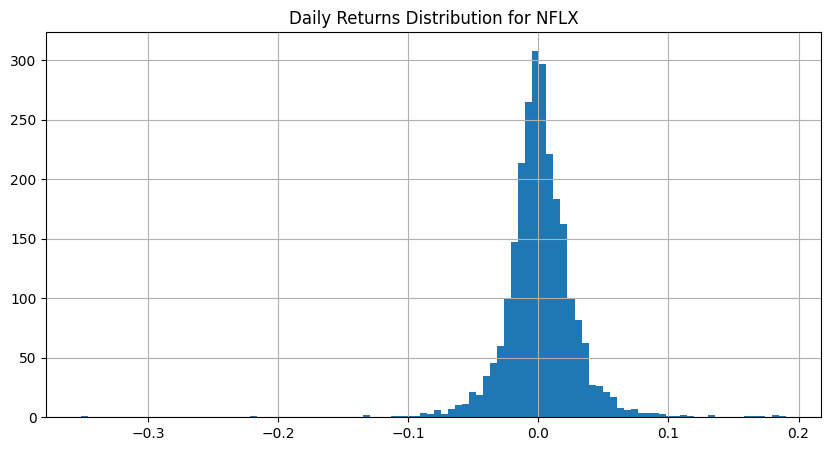

In [11]:
for ticker, df in dfs.items():
    df['Returns'] = df['Close'].pct_change()
    df['Returns'].hist(bins=100, figsize=(10, 5))
    plt.title(f'Daily Returns Distribution for {ticker}')
    plt.show()
    plt.close()

## Seasonality and Trend Decomposition

<Figure size 1200x600 with 0 Axes>

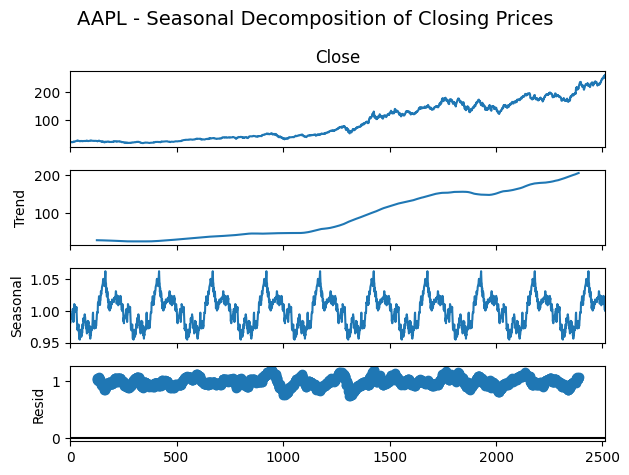

<Figure size 1200x600 with 0 Axes>

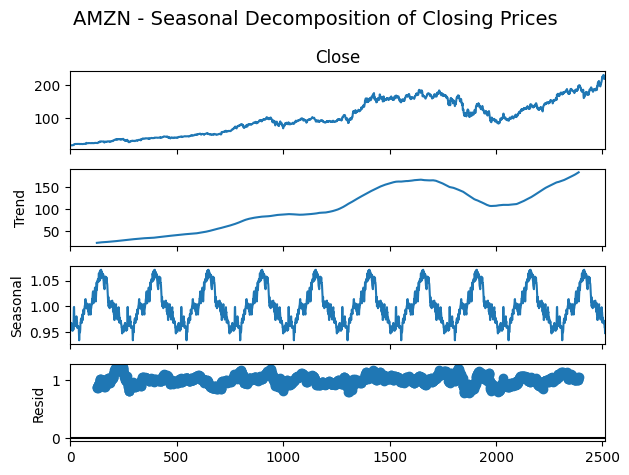

<Figure size 1200x600 with 0 Axes>

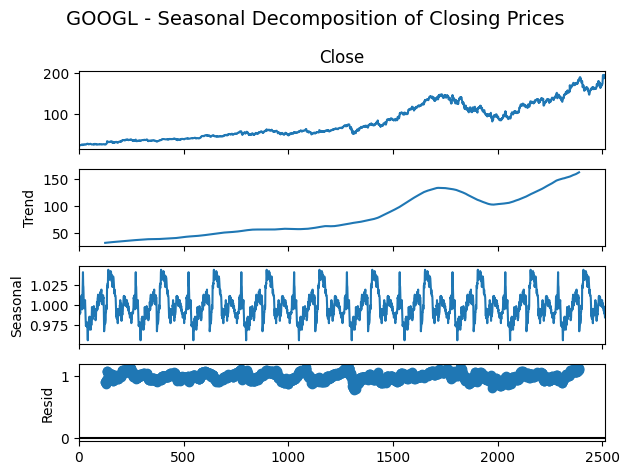

<Figure size 1200x600 with 0 Axes>

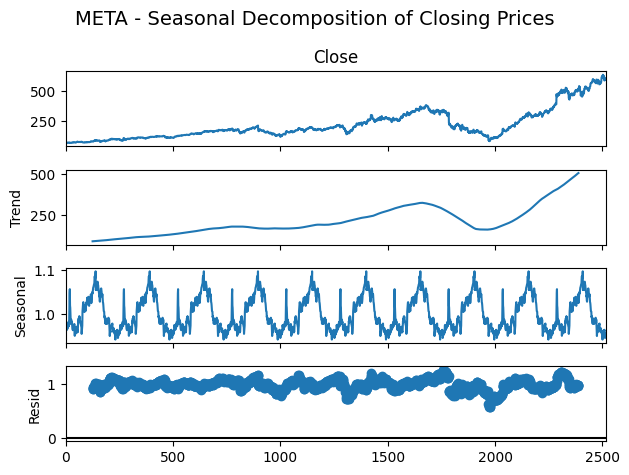

<Figure size 1200x600 with 0 Axes>

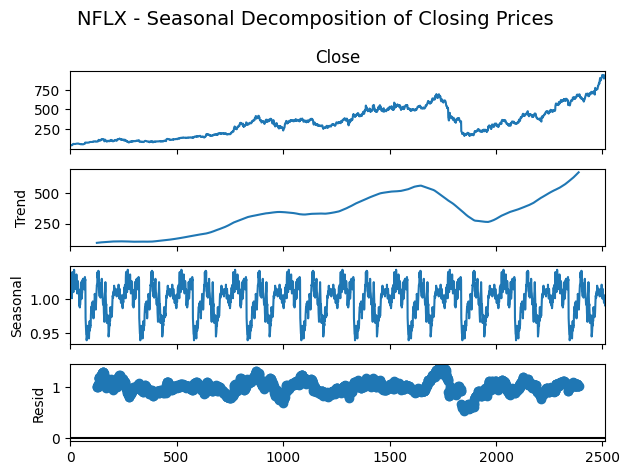

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

for ticker, df in dfs.items():
    plt.figure(figsize=(12, 6))
    result = seasonal_decompose(df['Close'], model='multiplicative', period=252)
    
    # Get the Figure object returned by the plot
    fig = result.plot()
    
    # Add a title to the top of the whole figure
    fig.suptitle(f"{ticker} - Seasonal Decomposition of Closing Prices", fontsize=14)
    
    plt.tight_layout()
    plt.show()
    plt.close()